## Set up n centres with 'fixed' or 'random' errors between set range

In [25]:
import numpy as np
import matplotlib.pyplot as plt
import random

mystyle = r'https://gist.githubusercontent.com/mbolt01/3087dffd11e70eccb08fdcf327374a5c/raw/std_fig'
plt.style.use(mystyle)

In [440]:
## values used in theses examples on 22/12/17.
all_ops_dict = {1: 0.9954953186148443,
                2: 0.98503066682102192,
                3: 0.99119523978568369,
                4: 1.0045425328133353,
                5: 0.99257322338596388,
                6: 1.0136809425106819,
                7: 0.99926715832982493,
                8: 1.0062559221007148,
                9: 0.98817612047359316,
                10: 1.0128540407736644}
## would need to set all_ops to this dict to use below.


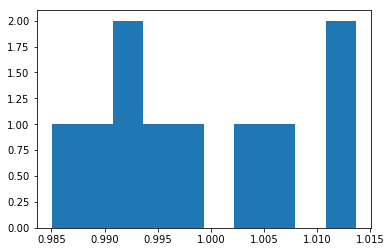

In [360]:
n=10
centres = [i+1 for i in range(n)]

## evenly spaced list of outputs between given range
#ops = list(np.linspace(0.98,1.02,n,endpoint=False))

## alternative for creating evenly spaced list with n items from specified starting range
#ops = []
#for i in range(n):
#    ops.append(0.98 + i*0.004)
    
## random normally distributed op values
ops = list(np.random.normal(1.0,0.008,n))

## random uniformly distributed op values (sorted)
#ops = sorted(list(np.random.uniform(0.98,1.02,n)))

all_ops = {}
for i in range(n):
    centre = centres[i]
    op = ops[i]
    all_ops[centre] = op
#print(all_ops) ## dict of centres known op results

##hist of ops
plt.hist(ops,)
plt.show()

In [361]:
## simulate each centre being audited by all other centres - store each centres result in a list and then dict them
all_ratios = {}
for host in all_ops:
    #print(host)#,all_ops[host])
    #visitors = []
    visitors = [visitor for visitor in all_ops if visitor is not host]
    #print(visitors)
    host_ratios = [all_ops[host]/all_ops[visitor] for visitor in visitors]
    #print(np.std(host_ratios))
    all_ratios[host] = host_ratios
#print(all_ratios)

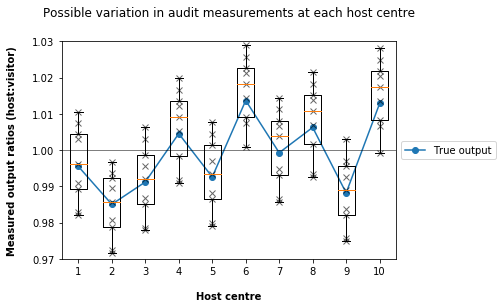

In [362]:
## plot variation of measurement ratios possible at each host centre
## based on which centre is the visiting centre

xs = []
ys = []
for host in all_ratios:
    xs.append(host)
    ys.append(all_ratios[host])

## plot range of possible ratios
plt.boxplot(x=ys,showmeans=False,whis='range')

## plot each measurement point:
for x in xs:
    #print(x)
    new_xs = [x]*len(ys[x-1])
    plt.plot(new_xs,ys[x-1],'x',c='black',alpha=0.6)

## plot actual output
plt.plot(centres,ops,marker='o',label = 'True output',zorder=0)

## plot 1.0 line
plt.axhline(1,c='black',zorder=0,lw=0.5)

plt.xlabel('Host centre')
plt.ylabel('Measured output ratios (host:visitor)')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.title('Possible variation in audit measurements at each host centre')
plt.ylim(0.97,1.03)

#plt.savefig('range_of_possible_audit_results.png', dpi=300, bbox_inches='tight')
plt.show()

In [363]:
all_ops

{1: 0.9954953186148443,
 2: 0.98503066682102192,
 3: 0.99119523978568369,
 4: 1.0045425328133353,
 5: 0.99257322338596388,
 6: 1.0136809425106819,
 7: 0.99926715832982493,
 8: 1.0062559221007148,
 9: 0.98817612047359316,
 10: 1.0128540407736644}

In [387]:
## also want to do above but for each combination (or a specified set of combinations)
## similar to what Tony did in his paper to show a couple of possible sets of results, rather than showing all of them.

## set up all possible combinaitons (how many will this be...? and how to do this...?)

## set up a random combination set (as done further down page for round robin modelling)
## can then repeat this to get multiple random sets
def round_robin_combo(n):
    """Function to produce a list of random round robin combinations"""

    ## list of centres
    centres = [i+1 for i in range(n)]

    ## seperate list of visitors
    visitors = list(centres)

    combos = []
    #print(hosts)
    for host in centres:
        ## select a visitor randomly who is not hte host
        ## check to ensure will not remain with final host being teh only visitor left
        if (host == max(centres)-1) and (max(centres) in (visitors)):
            visitor = max(centres)
        else:
            visitor = random.choice([visitor for visitor in visitors if visitor is not host])

        ## remove visitor from possible visitors
        visitors.remove(visitor)
        combos.append((host,visitor))
    return combos

def host_to_visitor_ratio(host,visitor, actual_ops):
    """Function to returnt he host:visitor ratio to save retyping this often.
    all_ops = dictionary of {centre:actual output}"""
    #print(host)
    return actual_ops[host]/actual_ops[visitor]

rounds = 2 ## number of repeat audit round with randomly assigned host and visitor

audit_rounds = {}

for the_round in range(1,rounds+1):
    print('---- round ' + str(the_round) + ' ----')

    ## create round robin audit set
    audits = round_robin_combo(n)

    ## calcualte the ratios of each visit and store in dict
    audit_results = {}
    for audit in audits:
        host = audit[0]
        visitor = audit[1]
        audit_results[audit] = host_to_visitor_ratio(host,visitor,actual_ops = all_ops)
        
    ## store the audit rounds together
    audit_rounds[the_round] = audit_results

    ## show the results
    for key in sorted(audit_results):
        print(repeat,key,audit_results[key])

---- round 1 ----
499 (1, 3) 1.00433827631
499 (2, 4) 0.9805763665
499 (3, 8) 0.985032950381
499 (4, 2) 1.0198083843
499 (5, 7) 0.993301155864
499 (6, 10) 1.0008164076
499 (7, 9) 1.01122374608
499 (8, 6) 0.992675189896
499 (9, 1) 0.992647682009
499 (10, 5) 1.02043256549
---- round 2 ----
499 (1, 3) 1.00433827631
499 (2, 1) 0.989487994973
499 (3, 7) 0.991922161679
499 (4, 6) 0.990984925025
499 (5, 2) 1.00765717944
499 (6, 9) 1.02580999632
499 (7, 8) 0.993054685575
499 (8, 5) 1.01378507741
499 (9, 10) 0.975635264997
499 (10, 4) 1.00827392339


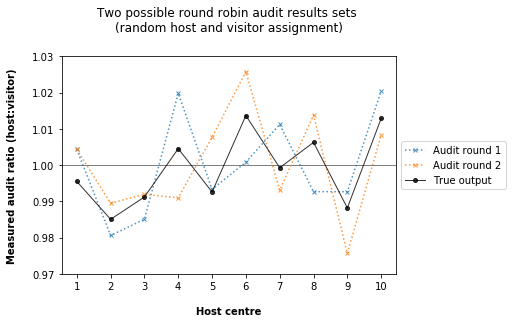

In [388]:
## plot the results of 'n' repeats
for the_round in audit_rounds:
    round_hosts = []
    round_results = []
    for audit in sorted(audit_rounds[the_round]):
        host = audit[0]
        visitor = audit[1]
        result = audit_rounds[the_round][(host,visitor)]
        round_hosts.append(host)
        round_results.append(result)
        
        #print(host,result)
    plt.plot(round_hosts,round_results,label='Audit round ' + str(the_round), ls=':',marker='x',ms=4,alpha=0.8)

plt.axhline(1,lw=0.5,c='black',zorder=0)

## include the true values
plt.plot(list(all_ops.keys()),list(all_ops.values()),marker='o',ms=4,alpha=0.8, label='True output',lw=1,c='black')

plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.title('Two possible round robin audit results sets \n(random host and visitor assignment)')
plt.xlabel('Host centre')
plt.ylabel('Measured audit ratio (host:visitor)')
plt.ylim(0.97,1.03)
plt.xticks([i for i in range(1,11)])
#plt.savefig('round_robin_results_sets.png', dpi=300, bbox_inches='tight')
plt.show()

## this basically shows the same thing as above when repated lots of times. Only do for a couple fo repeats to see variaton.

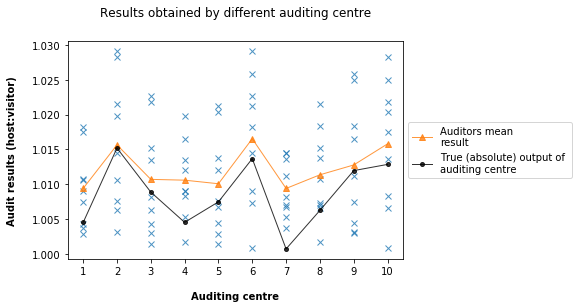

In [436]:
## now need to calc the ratio for each host centre as measured by theri visitor.
## can repeat this a number of times to get a distribution of possivble results (should be same as box plots already created)

do_abs=True

auditor = random.choice(centres) ## choose auditor randomly
auditor = 1 ## specify auditor manually

## auditor should visit all centres and get ratios

all_audits = {}

for auditor in centres:
    all_ratios = []
    for host in centres:
        if auditor is not host:
            ratio = all_ops[host]/all_ops[auditor]
            if do_abs == True:
                if ratio < 1:
                    ratio = 1/ratio

            all_ratios.append(ratio)
    all_audits[auditor] = all_ratios

auditor_means = []
for auditor in all_audits:
    plt.plot([auditor]*len(all_audits[auditor]),all_audits[auditor],'x',alpha=0.8,c='C0',ls='',lw=1)
    auditor_means.append(np.mean(all_audits[auditor]))

## plot auditor means
plt.plot(centres,auditor_means,marker='^',c='C1',alpha=0.8,lw=1,label = 'Auditors mean \nresult')

[x if x % 2 == 0 else 200 for x in l]

if do_abs == True:
    plt.plot(list(all_ops.keys()),[1/i if i<1 else i for i in list(all_ops.values())],marker='o',ms=4,alpha=0.8, label='True (absolute) output of \nauditing centre',lw=1,c='black')
else:
    plt.plot(list(all_ops.keys()),list(all_ops.values()),marker='o',ms=4,alpha=0.8, label='True output of \nauditing centre',lw=1,c='black')

if do_abs!=True:
    plt.axhline(1,lw=0.5,c='black',zorder=0)
plt.title('Results obtained by different auditing centre')
plt.xlabel('Auditing centre')
plt.ylabel('Audit results (host:visitor)')
plt.xticks(centres)

plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
if do_abs == True:
    #plt.savefig('single_auditor_results-abs.png', dpi=300, bbox_inches='tight')
else:
    #plt.savefig('single_auditor_results.png', dpi=300, bbox_inches='tight')

plt.show()

In [341]:
## get the SD from all centres and see how this varies compared with actual variation.
## use large number of centres to get better statistics.

all_sds = []
all_range = []
for host in all_ratios:
    host_sd = np.std(all_ratios[host])
    host_range = np.max(all_ratios[host])-np.min(all_ratios[host])
    all_sds.append(host_sd)
    all_range.append(host_range)
#plt.plot(centres,all_sds)
#plt.xlabel('Host Centre')
#plt.ylabel('SD of possible measurements at host centre')
#plt.show()

In [342]:
np.mean(all_sds)

0.0077764098024937821

In [343]:
## get the sds in one go so can loop and repeat. Based on normally distributed random output.

repeats = 500
repeat_sds = []

sd_set = 2 ## sd in percent

for repeat in range(repeats):
    print(repeat)

    ## create list of centres
    n=10
    centres = [i+1 for i in range(n)]

    ## random normally distributed op values
    ops = list(np.random.normal(1.0,sd_set/100,n))

    ## create dict of centre and its ouput
    all_ops = {}
    for i in range(n):
        centre = centres[i]
        op = ops[i]
        all_ops[centre] = op

    ## calcualte all possible measurement ratios at host centre
    all_ratios = {}
    for host in all_ops:
        #print(host)#,all_ops[host])
        #visitors = []
        visitors = [visitor for visitor in all_ops if visitor is not host]
        #print(visitors)
        host_ratios = [all_ops[host]/all_ops[visitor] for visitor in visitors]
        #print(np.std(host_ratios))
        all_ratios[host] = host_ratios

    ## calc the SD for each host centre
    all_sds = []
    all_range = []
    for host in all_ratios:
        host_sd = np.std(all_ratios[host])
        host_range = np.max(all_ratios[host])-np.min(all_ratios[host])
        all_sds.append(host_sd)
        all_range.append(host_range)
    repeat_sds.append(np.mean(all_sds))
    
#print(np.mean(all_sds))

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
27

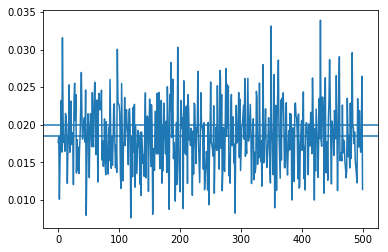

In [344]:
plt.plot(repeat_sds)
plt.axhline(0.02)
plt.axhline(np.mean(repeat_sds))
plt.show()

So I think that the measurement/calibration uncertainty would become equal to the overall audit uncertainty if there was a large enough number of audit centres participating.

In the case of only ~10 centres the absolute values of each centre can cause shifts in the results.
e.g. if a single centre audits all others, then they may introduce a systematic offset in results.
If round robin, then there coudl be large 'errors' introduced.
e.g. if -2% audits +2% then might show as 4% difference. Results should be examined as a whole.

If there is an offset in the group as a whole then this will show up in the mean of all audit results (if enough audits are completed)

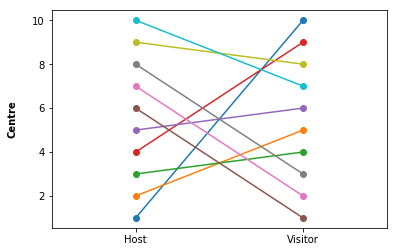

In [345]:
## round robin audits example.

## from the list of centres, need to select a random centre to act as the visitor.
## probably create a list of hosts, and a list of visitors. Visitor should be removed form list after assigned to a host.
## create the combinations first, then do the calcs.

n=10
#centres = [i+1 for i in range(n)]

#hosts = list(centres)
#visitors = list(centres)

#combos = []
#print(hosts)
#for host in hosts:
#    ## select a visitor
#    visitor = random.choice([visitor for visitor in visitors if visitor is not host]) ## select random visitor who is not the host
#    ## remove visitor from possible visitors
#    visitors.remove(visitor)
#    combos.append((host,visitor))
    
combos = round_robin_combo(n)

## plot who goes where
for i in combos:
    plt.plot([0,1],[i[0],i[1]],marker='o',alpha=1)
    plt.xticks([0,1],['Host','Visitor'])
    plt.ylabel('Centre')
    plt.xlim(-0.5,1.5)
plt.show()

In [35]:
## could also do for a single centre auditing and compare the audit results from this.
## e.g. if centre 1 did all the audits, how do tehse results compare to if centre 2 (etc) did all the audits?
## (the offset in resutls indicates an offset in teh auditors resutls if overall all are around zero?)
## in this case the visitor is held constant.
## for each visitor, loop through hosts and calc difs. So x-axis would be 'visiting' centre (the auditor)

In [353]:
for centre in centres:
    print(centre, all_ops[centre])

1 1.00616161571
2 0.998404600845
3 1.00814947072
4 0.975399994518
5 1.02107691008
6 0.998916695762
7 1.00275848877
8 0.993372621466
9 0.998972578089
10 0.989612505089
